# Changepoint Detection

#### Here is an example of anomaly/changepoint detection with the data collected from IEEE-14 bus systems. Phasor Meqasurement Units(PMU) are devices to record various readings such as, voltage and current magnitudes and angle, frequency etc. of the three phases for different buses of the system.

#### Goal : Our goal is to take the readings of a PMU associated with a bus and identify the times when some changes occured in the timeseries data. At first, all the buses start to work under normal operating conditions. Then some events like, capacitor banks in or out, load increase/ decrease take place. Our aim is to identify the times when such changes in the system are introduced studying the data itself.

#### Let's start with importing the necessary libraries.

In [1]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### Let's take a look at a small part of the dataset.

In [2]:
normal = pd.read_csv('PMU1_normal.csv')
print (normal)

          Time  Subsystem #1|PMU|PMU1|PMU1|IAp4-1an  \
0       0.0000                             0.032376   
1       0.0004                             0.032376   
2       0.0008                             0.032376   
3       0.0012                             0.032376   
4       0.0016                             0.032376   
5       0.0020                             0.032376   
6       0.0024                             0.032376   
7       0.0028                             0.032376   
8       0.0032                             0.032376   
9       0.0036                             0.032376   
10      0.0040                             0.032376   
11      0.0044                             0.032376   
12      0.0048                             0.032376   
13      0.0052                             0.032376   
14      0.0056                             0.032376   
15      0.0060                             0.032376   
16      0.0064                             0.032376   
17      0.

#### It's a timesries data with data recorded at an interval of 0.0004 sec. In this notebook we are working with the current magnitude readings of Phase A from PMU 1. 

#### Let's gather the data for 14 different events from different csv files and plot the data.

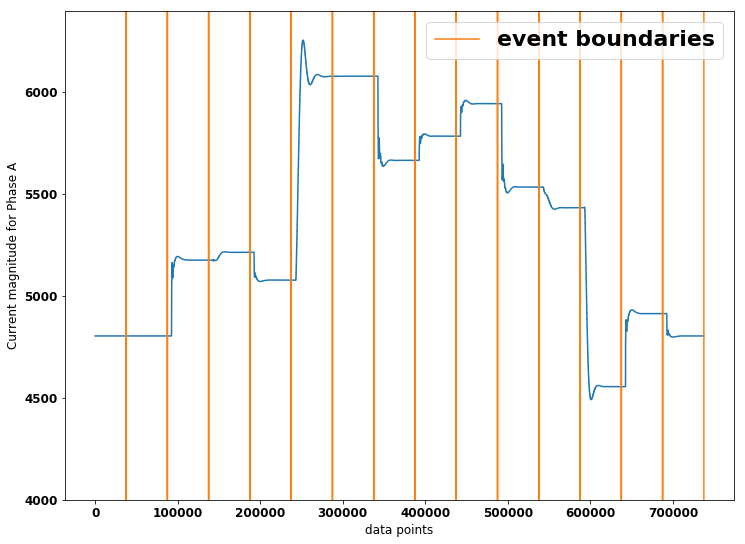

In [3]:
normal = pd.read_csv('PMU1_normal.csv')
normal.as_matrix()
pmu1norm = normal['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']

event1 = pd.read_csv('PMU1_event1.csv')
event1.as_matrix()
pmu1ev1 = event1['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        
                 
event2 = pd.read_csv('PMU1_event2.csv')
event2.as_matrix()
pmu1ev2 = event2['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        
                 
event3 = pd.read_csv('PMU1_event3.csv')
event3.as_matrix()
pmu1ev3 = event3['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event4 = pd.read_csv('PMU1_event4.csv')
event4.as_matrix()
pmu1ev4 = event4['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        
                 
event5 = pd.read_csv('PMU1_event5.csv')
event5.as_matrix()
pmu1ev5 = event5['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event6 = pd.read_csv('PMU1_event6.csv')
event6.as_matrix()
pmu1ev6 = event6['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event7 = pd.read_csv('PMU1_event7.csv')
event7.as_matrix()
pmu1ev7 = event7['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event8 = pd.read_csv('PMU1_event8.csv')
event8.as_matrix()
pmu1ev8 = event8['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event9 = pd.read_csv('PMU1_event9.csv')
event9.as_matrix()
pmu1ev9 = event9['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event10 = pd.read_csv('PMU1_event10.csv')
event10.as_matrix()
pmu1ev10 = event10['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event11 = pd.read_csv('PMU1_event11.csv')
event11.as_matrix()
pmu1ev11 = event11['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event12 = pd.read_csv('PMU1_event12.csv')
event12.as_matrix()
pmu1ev12 = event12['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']        

event13 = pd.read_csv('PMU1_event13.csv')
event13.as_matrix()
pmu1ev13 = event13['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma'] 

event14 = pd.read_csv('PMU1_event14.csv')
event14.as_matrix()
pmu1ev14 = event14['Subsystem #1|PMU|PMU1|PMU1|IAp4-1ma']      

pnorm=pd.Series(pmu1norm)                 
pev1 = pd.Series(pmu1ev1) 
pev2 = pd.Series(pmu1ev2) 
pev3 = pd.Series(pmu1ev3) 
pev4 = pd.Series(pmu1ev4) 
pev5 = pd.Series(pmu1ev5) 
pev6 = pd.Series(pmu1ev6) 
pev7 = pd.Series(pmu1ev7) 
pev8 = pd.Series(pmu1ev8) 
pev9 = pd.Series(pmu1ev9) 
pev10 = pd.Series(pmu1ev10) 
pev11 = pd.Series(pmu1ev11) 
pev12 = pd.Series(pmu1ev12) 
pev13 = pd.Series(pmu1ev13) 
pev14 = pd.Series(pmu1ev14) 

zl=pnorm.values.tolist()
l1=pev1.values.tolist()
l2=pev2.values.tolist()
l3=pev3.values.tolist()
l4=pev4.values.tolist()
l5=pev5.values.tolist()
l6=pev6.values.tolist()
l7=pev7.values.tolist()
l8=pev8.values.tolist()
l9=pev9.values.tolist()
l10=pev10.values.tolist()
l11=pev11.values.tolist()
l12=pev12.values.tolist()
l13=pev13.values.tolist()
l14=pev14.values.tolist()

totallist = zl+l1+l2+l3+l4+l5+l6+l7+l8+l9+l10+l11+l12+l13+l14

a=np.zeros(737500)
a[37500]=11250
a[87500]=11250
a[137500]=11250
a[187500]=11250
a[237500]=11250
a[287500]=11250
a[337500]=11250
a[387500]=11250
a[437500]=11250
a[487500]=11250
a[537500]=11250
a[587500]=11250
a[637500]=11250
a[687500]=11250
a[737499]=11250

matplotlib.rcParams.update({'font.size':12,'font.weight':'bold'})
fig=plt.figure()
fig.set_size_inches(12,9)
plt.xlabel('data points')
plt.ylabel('Current magnitude for Phase A')
plt.xlabel('data points')

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.ylim((4000,6400))
plt.plot(totallist)                 
plt.plot(a, label='event boundaries')
plt.legend()
plt.show()


# Changepoint Detection

#### Method for anomaly detection:

 * We didvide the entire time window in the interval of 2000 datapoints, i.e., 2000*0.0004=0.8 sec each.
 
 * For a set of two consecutive time windows the mean and standard deviation of the first time window is found out.

* The data points in the second time window those are above or below a certain number of standard deviations away from the mean of the previous time window are found out and noted as anomalies. 

* If all the anomalous data-points in a time window are within a same event then the first occurence of such a deviation is noted, i.e., when the anomalous behavior started in that event.

* Else, if the anomalous data-points in a time window are not within a same event, then the first anomalous point belonging to the next event is noted, i.e., when the anomalous behavior started in the next event.

* This process is repeated by sliding through the time windows. 


In [7]:
# A list where the event boundaries lie
boundlist=[37500,87500,137500,187500,237500,287500,337500,387500,437500,487500,537500,587500,637500,687500,737499]

# We didvide the entire time window in the interval of 200 datapoints, i.e., 2000*0.0004=0.8 sec each.
interval = 2000
changepoints = []
for i in range(367):
    gathered = totallist[2000*i:2000*(i+1)]
    gam = np.mean(gathered)
    gasd = np.std(gathered)
    test = totallist[2000*(i+1):2000*(i+2)]
    anoup = np.where(test > 500*gasd + gam)
    anodown = np.where(test < -500*gasd + gam)
    anoup=np.reshape(anoup,(np.shape(anoup[0])[0],1))
    anodown=np.reshape(anodown,(np.shape(anodown[0])[0],1))
    if anoup.size:
        c1=anoup[0][0]+2000*(i+1)
        c2=anoup[len(anoup)-1][0]+2000*(i+1)  
        kk=0
        for j in range(len(boundlist)):
            if c1>boundlist[j]:
                kk=kk+1
            else:
                break
        newdataup = anoup[0][0]+2000*(i+1)
        changepoints.append(newdataup)

        if c2>boundlist[kk]:
            for l in range(len(anoup)):
                if anoup[l][0]+2000*(i+1)>boundlist[kk]:
                    newdataup = anoup[l][0]+2000*(i+1)
                    changepoints.append(newdataup)

    if anodown.size:

        c1=anodown[0][0]+2000*(i+1)
        c2=anodown[len(anodown)-1][0]+2000*(i+1)  
        kk=0
        for j in range(len(boundlist)):
            if c1>boundlist[j]:
                kk=kk+1
            else:
                break
        newdatadown = anodown[0][0]+2000*(i+1)
        changepoints.append(newdatadown)
        
        if c2>boundlist[kk]:
            for l in range(len(anodown)):
                if anodown[l][0]+2000*(i+1)>boundlist[kk]:
                    newdatadown = anodown[l][0]+2000*(i+1)
                    changepoints.append(newdatadown)

#### Let's plot where the anomalies are detected.

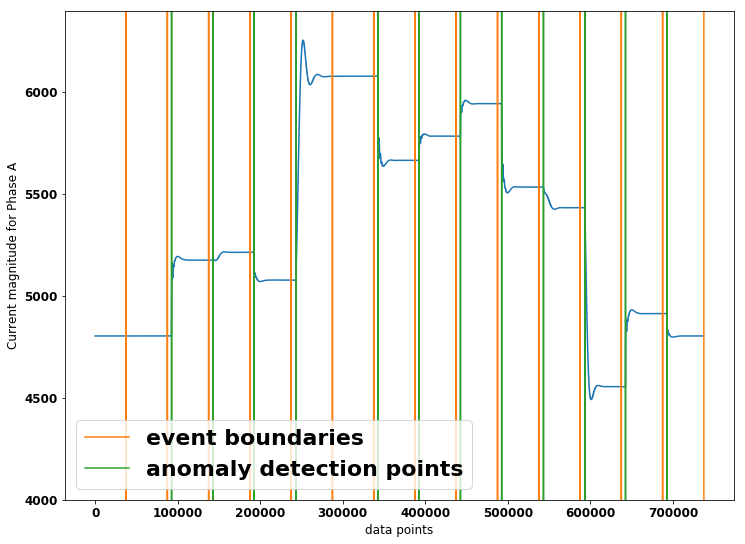

The changepoints are at:  [92601, 142984, 192568, 243182, 342590, 392556, 442594, 492530, 543167, 593221, 642564, 692571]


In [9]:
b=np.zeros(737500)
for i in range(len(changepoints)):
    b[changepoints[i]]=11250

matplotlib.rcParams.update({'font.size':12,'font.weight':'bold'})
fig=plt.figure()
fig.set_size_inches(12,9)
plt.xlabel('data points')
plt.ylabel('Current magnitude for Phase A')
plt.xlabel('data points')

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.ylim((4000,6400))
plt.plot(totallist)                 
plt.plot(a, label='event boundaries')
plt.plot(b, label='anomaly detection points')
plt.legend()
plt.show()
print ("The changepoints are at: ",changepoints)

#### Let's zoom in near the areas where these changepoints are noted.

Here we show three zoomed in plots to see whether the changepoints are detected correctly for three cases out of twelve.

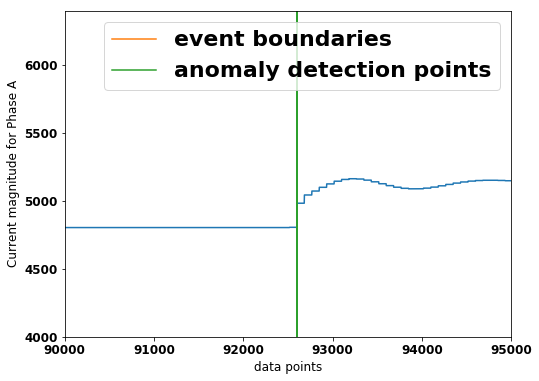

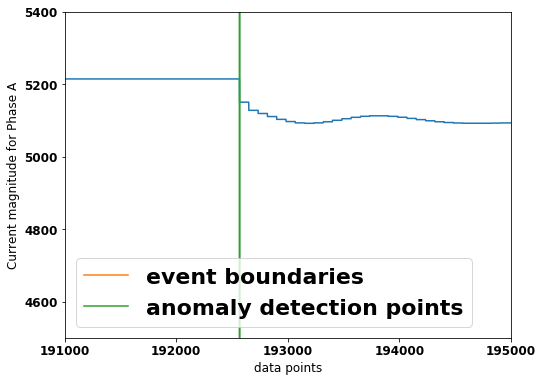

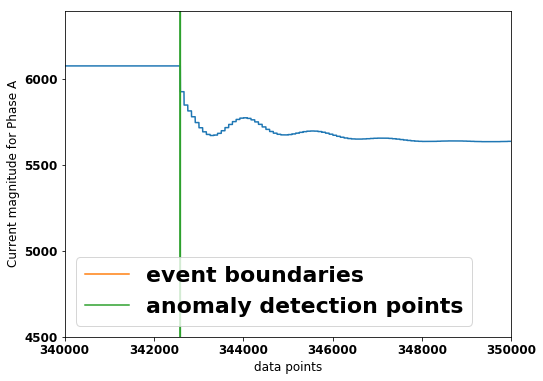

In [16]:
b=np.zeros(737500)
for i in range(len(changepoints)):
    b[changepoints[i]]=11250

matplotlib.rcParams.update({'font.size':12,'font.weight':'bold'})
fig=plt.figure()
fig.set_size_inches(8,6)
plt.xlabel('data points')
plt.ylabel('Current magnitude for Phase A')
plt.xlabel('data points')

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.ylim((4000,6400))
plt.xlim((90000,95000))
plt.plot(totallist)                 
plt.plot(a, label='event boundaries')
plt.plot(b, label='anomaly detection points')
plt.legend()
plt.show()

matplotlib.rcParams.update({'font.size':12,'font.weight':'bold'})
fig=plt.figure()
fig.set_size_inches(8,6)
plt.xlabel('data points')
plt.ylabel('Current magnitude for Phase A')
plt.xlabel('data points')

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.ylim((4500,5400))
plt.xlim((191000,195000))
plt.plot(totallist)                 
plt.plot(a, label='event boundaries')
plt.plot(b, label='anomaly detection points')
plt.legend()
plt.show()

matplotlib.rcParams.update({'font.size':12,'font.weight':'bold'})
fig=plt.figure()
fig.set_size_inches(8,6)
plt.xlabel('data points')
plt.ylabel('Current magnitude for Phase A')
plt.xlabel('data points')

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.ylim((4500,6400))
plt.xlim((340000,350000))
plt.plot(totallist)                 
plt.plot(a, label='event boundaries')
plt.plot(b, label='anomaly detection points')
plt.legend()
plt.show()

#### For each case, we see that the changepoint is detected exactly where it should have been. Thus we can detect changepoints for any time series data.

#### Next we apply CUSUSM (Cumulative Sum Control Chart) algorithm, which is another changepoint detection algorithm heavily used for anomaly detection purposes.

It is a statistical control chart to  track  the  variation  of  timeseries  data.   This  algorithm  isused to identify the timestamp when the anomaly started and ended, the amplitude of change, and an alarm (timestamp ofwhen the anomaly was detected). By choosing a threshold, we can control the number of false positives and negatives, i.e., we can modulate the sensitivity of the algorithm for anomaly detection.  

The upper ${(usum_s^t)}$ and lower ${(lsum_s^t)}$ cumulative sums are defined as:

\begin{equation}
    usum_s^t= \max\{ 0, usum_s^{t-1}+x_s^t- \mu -k \}
\end{equation}

\begin{equation}
    lsum_s^t= \min\{ 0, lsum_s^{t-1}+x_s^t- \mu +k \}
\end{equation}

The CUSUM criterion detects a sample ${x_s^t}$ of sensor $s$ to be anomalous at timestamp ${t}$, if 
 ${(usum_s^t > \eta_s)}$ or ${(lsum_s^t < \eta_s)}$, where ${\eta_s}$ is the detection threshold for sensor ${s}$. 

In [17]:
def detect_cusum(x, threshold=1, drift=0, ending=False, show=True, ax=None):
    
    x = np.atleast_1d(x).astype('float64')
    gp, gn = np.zeros(x.size), np.zeros(x.size)
    ta, tai, taf = np.array([[], [], []], dtype=int)
    tap, tan = 0, 0
    amp = np.array([])
    # Find changes (online form)
    for i in range(1, x.size):
        s = x[i] - x[i-1]
        gp[i] = gp[i-1] + s - drift  # cumulative sum for + change
        gn[i] = gn[i-1] - s - drift  # cumulative sum for - change
        if gp[i] < 0:
            gp[i], tap = 0, i
        if gn[i] < 0:
            gn[i], tan = 0, i
        if gp[i] > threshold or gn[i] > threshold:  # change detected!
            ta = np.append(ta, i)    # alarm index
            tai = np.append(tai, tap if gp[i] > threshold else tan)  # start
            gp[i], gn[i] = 0, 0      # reset alarm
    # THE CLASSICAL CUSUM ALGORITHM ENDS HERE

    # Estimation of when the change ends (offline form)
    if tai.size and ending:
        _, tai2, _, _ = detect_cusum(x[::-1], threshold, drift, show=False)
        taf = x.size - tai2[::-1] - 1
        # Eliminate repeated changes, changes that have the same beginning
        tai, ind = np.unique(tai, return_index=True)
        ta = ta[ind]
        # taf = np.unique(taf, return_index=False)  # corect later
        if tai.size != taf.size:
            if tai.size < taf.size:
                taf = taf[[np.argmax(taf >= i) for i in ta]]
            else:
                ind = [np.argmax(i >= ta[::-1])-1 for i in taf]
                ta = ta[ind]
                tai = tai[ind]
        # Delete intercalated changes (the ending of the change is after
        # the beginning of the next change)
        ind = taf[:-1] - tai[1:] > 0
        if ind.any():
            ta = ta[~np.append(False, ind)]
            tai = tai[~np.append(False, ind)]
            taf = taf[~np.append(ind, False)]
        # Amplitude of changes
        amp = x[taf] - x[tai]

    if show:
        _plot(x, threshold, drift, ending, ax, ta, tai, taf, gp, gn)

    return ta, tai, taf, amp


def _plot(x, threshold, drift, ending, ax, ta, tai, taf, gp, gn):
    """Plot results of the detect_cusum function, see its help."""

    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, (ax1) = plt.subplots(1, 1, figsize=(18, 9))

        t = range(x.size)
        ax1.plot(t, x, 'k--', lw=2)
        if len(ta):
            ax1.plot(tai, x[tai], 'P', mfc='b', mec='b', ms=12,
                     label='Begin')
            if ending:
                ax1.plot(taf, x[taf], 'X', mfc='g', mec='k', ms=12,
                         label='End')
            ax1.plot(ta, x[ta], 's', mfc='r', mec='r', mew=1, ms=5,
                     label='Alarm')
            ax1.legend(loc='best', framealpha=.5, numpoints=1)
        ax1.set_xlim(-.01*x.size, x.size*1.01-1)
        ax1.set_xlabel('Timesteps', fontsize=10)
        ax1.set_ylabel('Difference Speed', fontsize=10)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax1.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax1.set_title('Time series and detected changes ' +
                      '(threshold= %.3g, drift= %.3g): N changes = %d'
                      % (threshold, drift, len(tai)))
        print ("                                                          ")
        print ("                                                          ")
        print ("                                                          ")

        plt.tight_layout()
        plt.show()


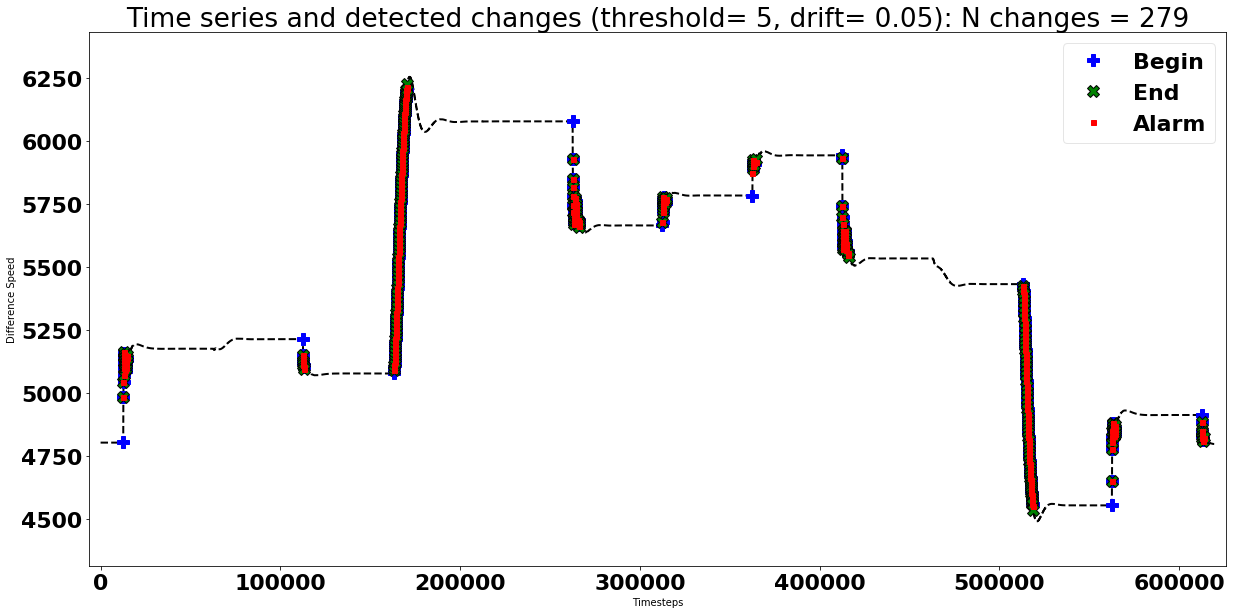

In [19]:
ta, tai, taf, amp = detect_cusum(totallist[80000:700000], 5, .05, True, True)

#### The algorithm points out all the changepoints detected depending on the threshold. 

# Clustering

#### Clustering is an unsupervised Machine Learning technique which groups a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). If certain points are anomalous, they will fall in a smaller cluster compared to the rest of the groups, so that they can be detected as outliers.

#### Load any dataset. Here we are loading the 'iris' dataset.

It has four attributes / features of the iris plant. 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

It has generally 3 classes. We are introducing some anomalous data points in this dataset and assign them as the 4th class. The goal is to see if the clustering algorithm can classify it as a separate small cluster which can be treated as outlier.

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data 
y = iris.target

#### Let's introduce some anomalous measurements (data and labels) and then take a look at the modified dataset.

In [42]:
a=np.array([[8,5, 8, 6], [8.2,5.5, 7.8, 5.6], [8.1,5.9, 8.2, 5.4], [8.3, 5.6, 8.1, 5.8], [7.9,5.4, 8, 5.6], [8.4,5.2, 7.9, 5.7]])

In [47]:
b=np.array([4,4,4,4,4,4])

In [43]:
X1 = np.concatenate((X,a), axis=0)

In [48]:
y1 = np.concatenate((y,b), axis=0)

In [31]:
X1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### The labels are:

In [49]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4])

In [50]:
np.shape(X1)

(156, 4)

In [51]:
np.shape(y1)

(156,)

#### Plotting the first two features of the data

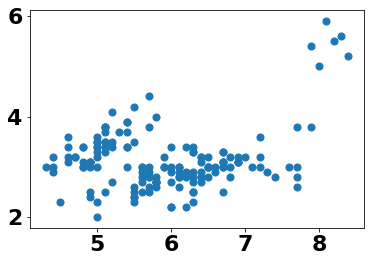

In [52]:
plt.scatter(X1[:, 0], X1[:, 1], s=50, cmap='viridis')

#### We are applying k-Means Algorithm: which is an Expectation–Maximization algorithm.

#### In short, the expectation–maximization approach here consists of the following procedure:

* Guess some cluster centers
* Repeat until converged
    * E-Step: assign points to the nearest cluster center
    * M-Step: set the cluster centers to the mean

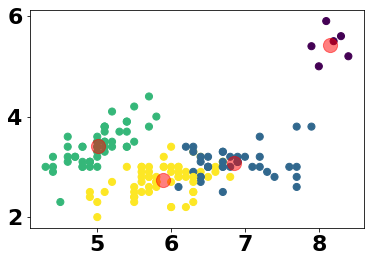

In [53]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=4):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X1, 4)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#### The plots show four different clusters with four different colors. The red dots indicate the cluster centers. 

#### The smallest cluster having few number of datapoints can be treated as outlier as it belongs to a separate group, have fewer data samples and is far away from all other clusters.